<a href="https://colab.research.google.com/github/bmulas1535/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module4-sequence-your-narrative/LS_DS_124_Sequence_your_narrative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence Your Narrative - Assignment

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

# ASSIGNMENT
 

1.   Replicate the Lesson Code
2.   Take it further by using the same gapminder dataset to create a sequence of visualizations that combined tell a story of your choosing.

Get creative! Use text annotations to call out specific countries, maybe: change how the points are colored, change the opacity of the points, change their sized, pick a specific time window. Maybe only work with a subset of countries, change fonts, change background colors, etc. make it your own!

In [0]:
# Allow for multiple dataframe outputs in a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
import pandas as pd

In [0]:
# Load the different raw sets of data to their own pandas DataFrame
# Let each be it's own variable describing what data it contains

income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

population= pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

entities= pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [4]:
income.shape
lifespan.shape

(46513, 3)

(44370, 3)

In [0]:
m1 = pd.merge(income, lifespan, how='inner', on=['geo', 'time'])
m2 = pd.merge(m1, population, how='inner', on=['geo', 'time'])

In [6]:
m2.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [7]:
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [0]:
m3 = pd.merge(m2, entities[['country', 'name', 'main_religion_2008','world_6region']], how='inner', left_on='geo', right_on='country')

In [9]:
m3.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,main_religion_2008,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,muslim,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,muslim,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,muslim,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,muslim,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,muslim,south_asia


In [10]:
m3= m3.drop('geo', axis=1)
m3= m3.rename(columns={'time': 'year', 'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income', 'population_total': 'population',
                       'country':'country_code', 'name':'country', 'main_religion_2008':'religion', 'world_6region':'region'})
m3.head()

,year,income,life_expectancy_years,population,country_code,country,religion,region
0,1800,603,28.21,3280000,afg,Afghanistan,muslim,south_asia
1,1801,603,28.20,3280000,afg,Afghanistan,muslim,south_asia
2,1802,603,28.19,3280000,afg,Afghanistan,muslim,south_asia
3,1803,603,28.18,3280000,afg,Afghanistan,muslim,south_asia
4,1804,603,28.17,3280000,afg,Afghanistan,muslim,south_asia


In [19]:
year1950= m3[m3['year']== 1950]
year1975= m3[m3['year']== 1975]
year2000= m3[m3['year']== 2000]
year2015= m3[m3['year']== 2015]

year1950.head()

,year,income,life_expectancy_years,population,country_code,country,religion,region
150,1950,1040,31.98,7752118,afg,Afghanistan,muslim,south_asia
369,1950,3180,36.60,4548023,ago,Angola,christian,sub_saharan_africa
588,1950,1918,54.47,1263174,alb,Albania,muslim,europe_central_asia
854,1950,1208,43.36,69588,are,United Arab Emirates,muslim,middle_east_north_africa
1073,1950,8317,60.62,17150336,arg,Argentina,christian,america


In [0]:
year1950_n= year1950[['country','income','religion']].dropna()
year1975_n= year1975[['country', 'income','religion']].dropna()
year2000_n= year2000[['country', 'income','religion']].dropna()
year2015_n= year2015[['country', 'income','religion']].dropna()

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [0]:
y1950_ct= pd.crosstab(index=year1950_n['religion'], columns=year1950_n['income']>7500, normalize='index')
y1975_ct= pd.crosstab(index=year1975_n['religion'], columns=year1975_n['income']>7500, normalize='index')
y2000_ct= pd.crosstab(index=year2000_n['religion'], columns=year2000_n['income']>7500, normalize='index')
y2015_ct= pd.crosstab(index=year2015_n['religion'], columns=year2015_n['income']>7500, normalize='index')

In [98]:
# Code for formatting percentage : '{:.1f}%'.format(y2015_ct.iloc[0,0]*100)

y1950_ct

income,False,True
religion,,
christian,0.809091,0.190909
eastern_religions,1.000000,0.000000
muslim,0.955556,0.044444


Text(-0.48, 79000, 'Religional Disparity:')

Text(-0.48, 76500, "A Tale of Wars' Effect on Regional Development.")

Text(1.15, 70000, 'Year: 2015')

Text(0, 0.5, 'Avg. Income per Year (Adj. For Inflation)')

Text(0.5, 0, 'Country by Primary Religion')

Text(-0.4, 7350, '51.11%')

Text(1.25, 7350, '31.86%')

Text(0.2, 8500, 'Income Under 7500')

(-0.5, 1.5)

(0, 75000)

([<matplotlib.axis.XTick at 0x7f846eee6780>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x7f846eef3518>,
 <a list of 8 Text yticklabel objects>)

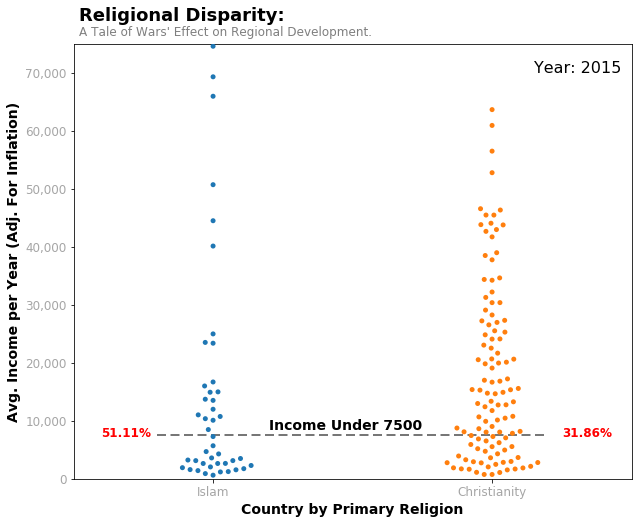

In [208]:
## Start Plotting ## 
fig= plt.figure(figsize=(10,8), facecolor='grey')
fig.patch.set_alpha(0)

ax= plt.subplot(111)
ax.patch.set_alpha(0)

ax.text(x=-.48, y=79000, s='Religional Disparity:', fontweight='bold', fontsize=18)
ax.text(x=-.48, y=76500, s="A Tale of Wars' Effect on Regional Development.", fontsize=12, alpha=.5)
ax.text(x=1.15, y=70000, s='Year: 2015', fontsize=16)



sns.swarmplot(year2015['religion'], year2015['income'])
ax.set_ylabel('Avg. Income per Year (Adj. For Inflation)', fontsize=14, fontweight='bold')
ax.set_xlabel('Country by Primary Religion', fontsize=14, fontweight='bold')
ax.text(x=-.4, y=7350, s='{:.2f}%'.format(y2015_ct.iloc[2,0]*100), fontsize=12, fontweight='bold', color='red')
ax.text(x=1.25, y=7350, s='{:.2f}%'.format(y2015_ct.iloc[0,0]*100), fontsize=12, fontweight='bold', color='red')

ax.axhline(7500, .15, .85, dashes=(6,3,6,3), alpha=.7, color='black')
ax.text(x=.2, y=8500, s='Income Under 7500', color='black', fontweight='bold', fontsize=14)

plt.xlim(-.5, 1.5)
plt.ylim(0, 75000)

locs, labels= plt.xticks()
plt.xticks([0, 1], labels=['Islam', 'Christianity'], fontsize=12, alpha=.7, color="grey")

locs, labels= plt.yticks()
plt.yticks([0, 10000, 20000, 30000, 40000, 50000, 60000, 70000], labels=['0', '10,000', '20,000', '30,000', '40,000','50,000','60,000','70,000'],fontsize=12, alpha=.7, color='grey')

plt.grid(False)



# STRETCH OPTIONS

## 1. Animate!

- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- Try using [Plotly](https://plot.ly/python/animations/)!
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)
- [Using Phoebe for animations in Google Colab](https://colab.research.google.com/github/phoebe-project/phoebe2-docs/blob/2.1/tutorials/animations.ipynb)

## 2. Study for the Sprint Challenge

- Concatenate DataFrames
- Merge DataFrames
- Reshape data with `pivot_table()` and `.melt()`
- Be able to reproduce a FiveThirtyEight graph using Matplotlib or Seaborn.

## 3. Work on anything related to your portfolio site / Data Storytelling Project

In [0]:
# TODO